In [4]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv("Mall_Customers.csv")

In [3]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [6]:
from sklearn.cluster import KMeans
wcss = [] # Within-Cluster Sum of Square
# It is the sum of squared distance between each point & the centroid in a cluster

In [8]:
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i,init = "k-means++")
    kmeans.fit(data.iloc[:,3:])
    wcss.append(kmeans.inertia_)

Text(0.5, 1.0, 'Elbow Method')

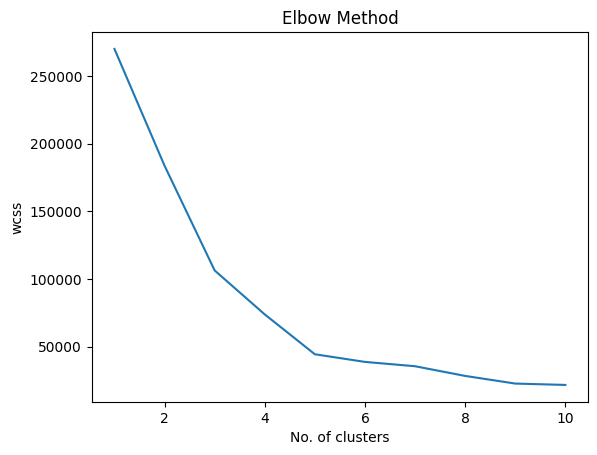

In [9]:
plt.plot(range(1, 11),wcss)
plt.xlabel("No. of clusters")
plt.ylabel("wcss")
plt.title("Elbow Method")

In [11]:
km = KMeans(n_clusters = 5)
km.fit(data.iloc[:,3:])

KMeans(n_clusters=5)

In [12]:
y_pred = km.predict(data.iloc[:,3:])
y_pred

array([2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 3,
       2, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 1, 4, 3, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 3, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4])

Text(0.5, 1.0, 'Customer Segments')

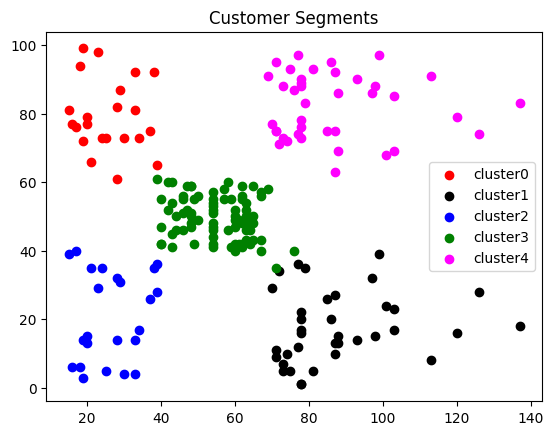

In [14]:
data["cluster"] = y_pred
df0 = data[data["cluster"] == 0]
df1 = data[data["cluster"] == 1]
df2 = data[data["cluster"] == 2]
df3 = data[data["cluster"] == 3]
df4 = data[data["cluster"] == 4]
plt.scatter(df0["Annual Income (k$)"],df0["Spending Score (1-100)"],c="red",label="cluster0")
plt.scatter(df1["Annual Income (k$)"],df1["Spending Score (1-100)"],c="black",label="cluster1")
plt.scatter(df2["Annual Income (k$)"],df2["Spending Score (1-100)"],c="blue",label="cluster2")
plt.scatter(df3["Annual Income (k$)"],df3["Spending Score (1-100)"],c="green",label="cluster3")
plt.scatter(df4["Annual Income (k$)"],df4["Spending Score (1-100)"],c="magenta",label="cluster4")
plt.legend()
plt.title("Customer Segments")